# Ultralytics

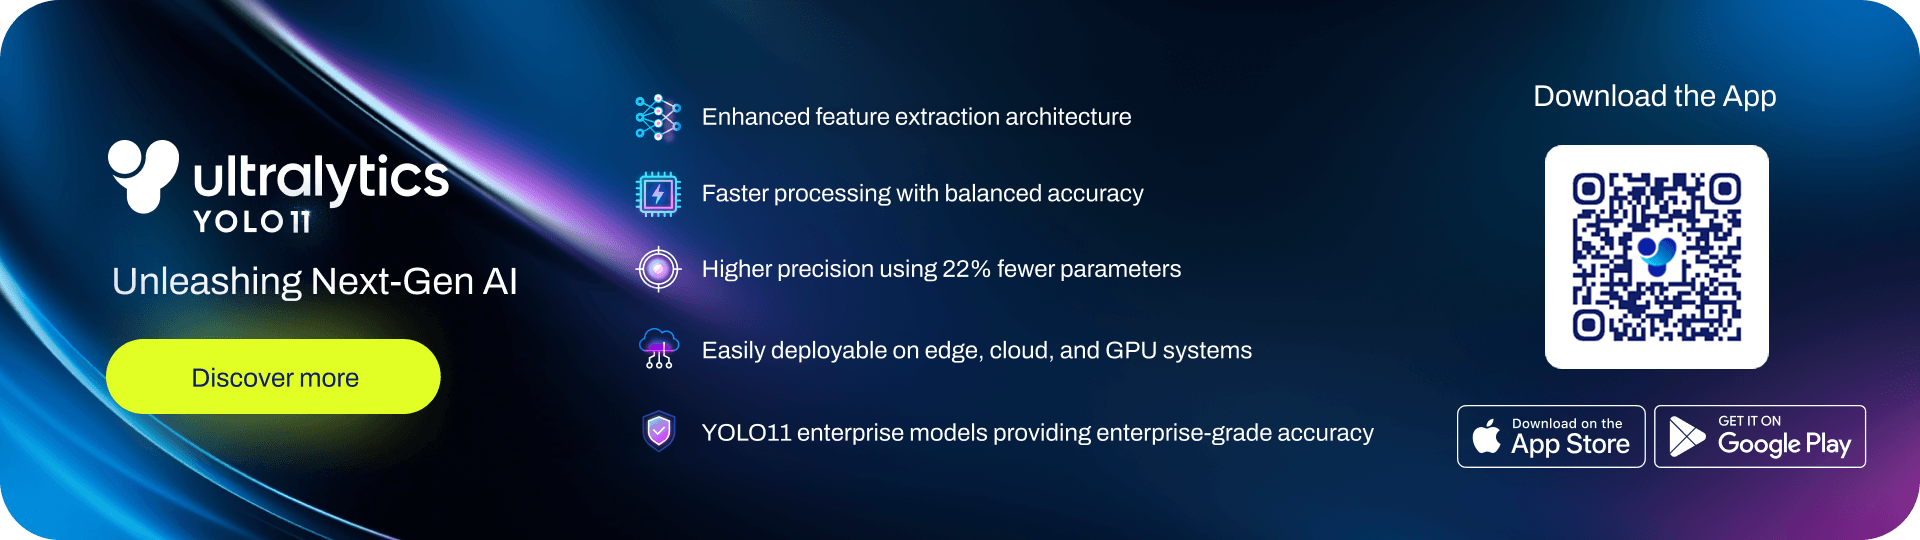

Ultralytics는 객체 탐지, 분할, 분류, 자세 추정 등 다양한 컴퓨터 비전 작업을 위한 강력한 오픈소스 프레임워크를 제공합니다. 특히 YOLOv5부터 YOLOv12까지의 최신 모델을 포함하여, 사용자가 손쉽게 모델을 훈련하고 배포할 수 있도록 다양한 기능을 지원합니다.

## 설치 방법 및 사용 환경

Ultralytics는 다양한 환경에서 설치 및 실행이 가능합니다:
- pip 설치 (Google Colab 환경에서 권장되는 방법):
```
pip install ultralytics
```
최신 안정 버전 설치를 위한 가장 간단한 버전입니다.
- conda 설치:
```
conda install -c conda-forge ultralytics
```
CUDA 환경에서는 pytorch, pytorch-cuda, ultralytics를 함께 설치하는 것이 권장됩니다.
- Docker 사용:
```
docker pull ultralytics/ultralytics:latest-conda
docker run -it --ipc=host --gpus all ultralytics/ultralytics:latest-conda
```
독립된 개발 환경을 보장할 수 있어 개발과 배포에 유용합니다.
Jetpack 4 이상의 Jetson 계열에서도 사용할 수 있습니다.



## 훈련 시 데이터셋 구조

Ultralytics YOLO는 COCO 형식을 기반으로 한 자체 YOLO 포맷을 사용합니다. 데이터셋 구성은 다음과 같습니다:
- 디렉토리 구조
```
dataset/
├── images/
│    ├── train/
│    └── val/
└── labels/
      ├── train/
      └── val/
```
- 레이블 파일 형식
```
<class_id> <x_center> <y_center> <width> <height>
```
각 이미지에 대한 .txt 파일이 존재하며, 각 줄은 위와 같은 형식으로 객체를 정의합니다. 이 때 좌표는 이미지 크기에 대한 비율료 표현됩니다. 즉 [0,1]로 정규화된 형식으로 작성합니다.
- 데이터 설정 파일 (data.yaml) 예시
```
path: /content/my_dataset
train: images/train
val: images/val
names:
  0: person
  1: car
  2: bicycle
```


## 모델 훈련 방법

Ultralytics는 CLI와 Python API를 통해 모델 훈련을 지원합니다.

- Python API 예시:
```
from ultralytics import YOLO
model = YOLO('yolov8n.pt')  # 사전 학습된 모델 로드
model.train(data='data.yaml', epochs=100, imgsz=640)
```

- CLI 예시:
  - 모델 훈련
  ```
  yolo train model=yolov8n.pt data=data.yaml epochs=100 imgsz=640
  ```
  - 훈련 중단 후 재개
  ```
  yolo train resume=True
  ```
  - 다중 GPU 훈련
  ```
  yolo train device=0,1,2,3
  ```

[공식 문서](https://docs.ultralytics.com/ko/modes/train/)에서 더 자세한 내용을 확인할 수 있습니다.


## 데이터 증강 기법 및 옵션

Ultralytics는 다양한 데이터 증강 기법을 내장하고 있어 모델의 일반화 성능을 향상시킬 수 있습니다.

- 공간 변환:
  - degrees: 회전 각도 범위
  - translate: 이동 비율
  - scale: 스케일 조정 범위
  - shear: 기울이기 각도
  - perspective: 원근 왜곡 정도

- 색상 변환:
  - hsv_h: 색조 변화 범위
  - hsv_s: 채도 변화 범위
  - hsv_v: 명도 변화 범위

- 복합 기법:
  - Mosaic: 여러 이미지를 결합하여 새로운 이미지 생성
  - MixUp: 두 이미지를 혼합하여 새로운 이미지 생성
  - Copy-Paste: 객체를 다른 이미지에 복사하여 붙여넣기

- 사용 예시 (Python API):
```
model.train(data='data.yaml', epochs=100, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4)
```

- 사용 예시 (CLI):
```
yolo train data=data.yaml epochs=100 hsv_h=0.015 hsv_s=0.7 hsv_v=0.4
```

- 증강 비활성화 예시:
```
model.train(data='data.yaml', fliplr=0.0, flipud=0.0)
```

[공식 문서](https://docs.ultralytics.com/ko/guides/yolo-data-augmentation/) 에서 더 자세한 내용을 확인할 수 있습니다.

## 모델 배포 방법

훈련된 모델은 다양한 형식으로 내보내어 다양한 환경에서 배포할 수 있습니다.

- 지원하는 내보내기 형식:
  - ONNX: 다양한 플랫폼에서의 호환성
  - OpenVINO: Intel 하드웨어 최적화\
  - TensorRT: NVIDIA GPU 최적화
  - CoreML: Apple 기기에서의 실행
  - TorchScript: PyTorch 기반 배포

- 내보내기 예시 (Python API):
```
model.export(format='onnx')
```

- 내보내기 예시 (CLI):
```
yolo export model=best.pt format=onnx
```

## ONNX 파일로 추론 예시 (onnx runtime 사용)

- onnxruntime과 opencv 설치 필요

```
!pip install onnxruntime opencv-python
```


- onnxruntime에서 onnx 파일을 추론하는 코드

```
import onnxruntime
import cv2
import numpy as np

# ONNX 모델 로드
onnx_model_path = 'yolo_model.onnx'
session = onnxruntime.InferenceSession(onnx_model_path)

# 이미지 준비
image_path = 'sample_image.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_resized = cv2.resize(image_rgb, (640, 640))
input_image = image_resized / 255.0
input_image = input_image.transpose(2, 0, 1).astype(np.float32)
input_image = np.expand_dims(input_image, axis=0)

# ONNX Runtime 추론
outputs = session.run(None, {'images': input_image})

# 출력 확인
print(outputs)
```

## 상업적 사용 시 주의사항

Ultralytics YOLO는 기본적으로 오픈소스로 제공되지만, 라이선스는 AGPL-3.0입니다.

이 라이선스는 소스 코드를 공개하는 조건 하에 자유로운 사용을 허용하며, 네트워크를 통한 서비스로 이용할 경우에도 수정된 전체 소스 코드를 공개해야 합니다.

만약 코드를 공개하지 않고 상업적으로 활용하려면 별도의 상용 라이선스를 구매해야 합니다.

요약하면 Ultralytics 제공 모델(예: YOLOv8, YOLOv11 등)을 기업 프로젝트에 사용하고자 할 경우, AGPL 조항을 준수하거나 Ultralytics로부터 상업용 라이선스를 받아야 함을 유념하세요.

규정을 지키지 않고 무단으로 폐쇄소스 프로젝트에 사용하면 법적인 문제가 될 수 있으므로, 연구/학습 목적이 아닌 배포용 제품에 활용할 때는 각별히 라이선스 조건을 확인하시기 바랍니다.